In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Define realistic disease-symptom relationships
disease_symptoms = {
    'flu': {
        'fever': 0.9,
        'cough': 0.8,
        'headache': 0.7,
        'fatigue': 0.9,
        'nausea': 0.3,
        'runny_nose': 0.6,
        'sore_throat': 0.7,
        'muscle_ache': 0.8,
        'chills': 0.8,
        'diarrhea': 0.1
    },
    'cold': {
        'fever': 0.2,
        'cough': 0.9,
        'headache': 0.3,
        'fatigue': 0.4,
        'nausea': 0.1,
        'runny_nose': 0.9,
        'sore_throat': 0.8,
        'muscle_ache': 0.2,
        'chills': 0.2,
        'diarrhea': 0.05
    },
    'food_poisoning': {
        'fever': 0.4,
        'cough': 0.1,
        'headache': 0.3,
        'fatigue': 0.6,
        'nausea': 0.9,
        'runny_nose': 0.05,
        'sore_throat': 0.1,
        'muscle_ache': 0.3,
        'chills': 0.5,
        'diarrhea': 0.9
    },
    'migraine': {
        'fever': 0.1,
        'cough': 0.05,
        'headache': 0.95,
        'fatigue': 0.7,
        'nausea': 0.8,
        'runny_nose': 0.05,
        'sore_throat': 0.05,
        'muscle_ache': 0.3,
        'chills': 0.1,
        'diarrhea': 0.05
    },
    'stress': {
        'fever': 0.05,
        'cough': 0.1,
        'headache': 0.8,
        'fatigue': 0.9,
        'nausea': 0.4,
        'runny_nose': 0.05,
        'sore_throat': 0.1,
        'muscle_ache': 0.6,
        'chills': 0.2,
        'diarrhea': 0.2
    },
    'allergy': {
        'fever': 0.05,
        'cough': 0.6,
        'headache': 0.3,
        'fatigue': 0.4,
        'nausea': 0.1,
        'runny_nose': 0.9,
        'sore_throat': 0.4,
        'muscle_ache': 0.1,
        'chills': 0.05,
        'diarrhea': 0.05
    }
}

# Get all symptoms
all_symptoms = list(disease_symptoms['flu'].keys())
all_diseases = list(disease_symptoms.keys())

print(f"Symptoms: {all_symptoms}")
print(f"Diseases: {all_diseases}")

Symptoms: ['fever', 'cough', 'headache', 'fatigue', 'nausea', 'runny_nose', 'sore_throat', 'muscle_ache', 'chills', 'diarrhea']
Diseases: ['flu', 'cold', 'food_poisoning', 'migraine', 'stress', 'allergy']


In [3]:
def generate_patient_data(disease, symptoms_dict, num_samples=100):
    """Generate realistic patient data for a specific disease"""
    data = []
    
    for i in range(num_samples):
        patient = {'disease': disease}
        
        # Generate symptoms based on probabilities
        for symptom in all_symptoms:
            probability = symptoms_dict[symptom]
            # Add some randomness to make it more realistic
            probability += np.random.normal(0, 0.1)
            probability = max(0, min(1, probability))  # Clamp between 0 and 1
            
            patient[symptom] = 1 if np.random.random() < probability else 0
        
        data.append(patient)
    
    return data

# Generate data for each disease
all_data = []
samples_per_disease = 200

for disease in all_diseases:
    print(f"Generating data for {disease}...")
    disease_data = generate_patient_data(disease, disease_symptoms[disease], samples_per_disease)
    all_data.extend(disease_data)

print(f"Total samples generated: {len(all_data)}")

Generating data for flu...
Generating data for cold...
Generating data for food_poisoning...
Generating data for migraine...
Generating data for stress...
Generating data for allergy...
Total samples generated: 1200


In [4]:
# Create DataFrame
df = pd.DataFrame(all_data)

# Basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nDisease Distribution:")
print(df['disease'].value_counts())

print("\nFirst few rows:")
print(df.head())

Dataset Shape: (1200, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   disease      1200 non-null   object
 1   fever        1200 non-null   int64 
 2   cough        1200 non-null   int64 
 3   headache     1200 non-null   int64 
 4   fatigue      1200 non-null   int64 
 5   nausea       1200 non-null   int64 
 6   runny_nose   1200 non-null   int64 
 7   sore_throat  1200 non-null   int64 
 8   muscle_ache  1200 non-null   int64 
 9   chills       1200 non-null   int64 
 10  diarrhea     1200 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 103.3+ KB
None

Disease Distribution:
disease
flu               200
cold              200
food_poisoning    200
migraine          200
stress            200
allergy           200
Name: count, dtype: int64

First few rows:
  disease  fever  cough  headache  fatigue  nausea  run

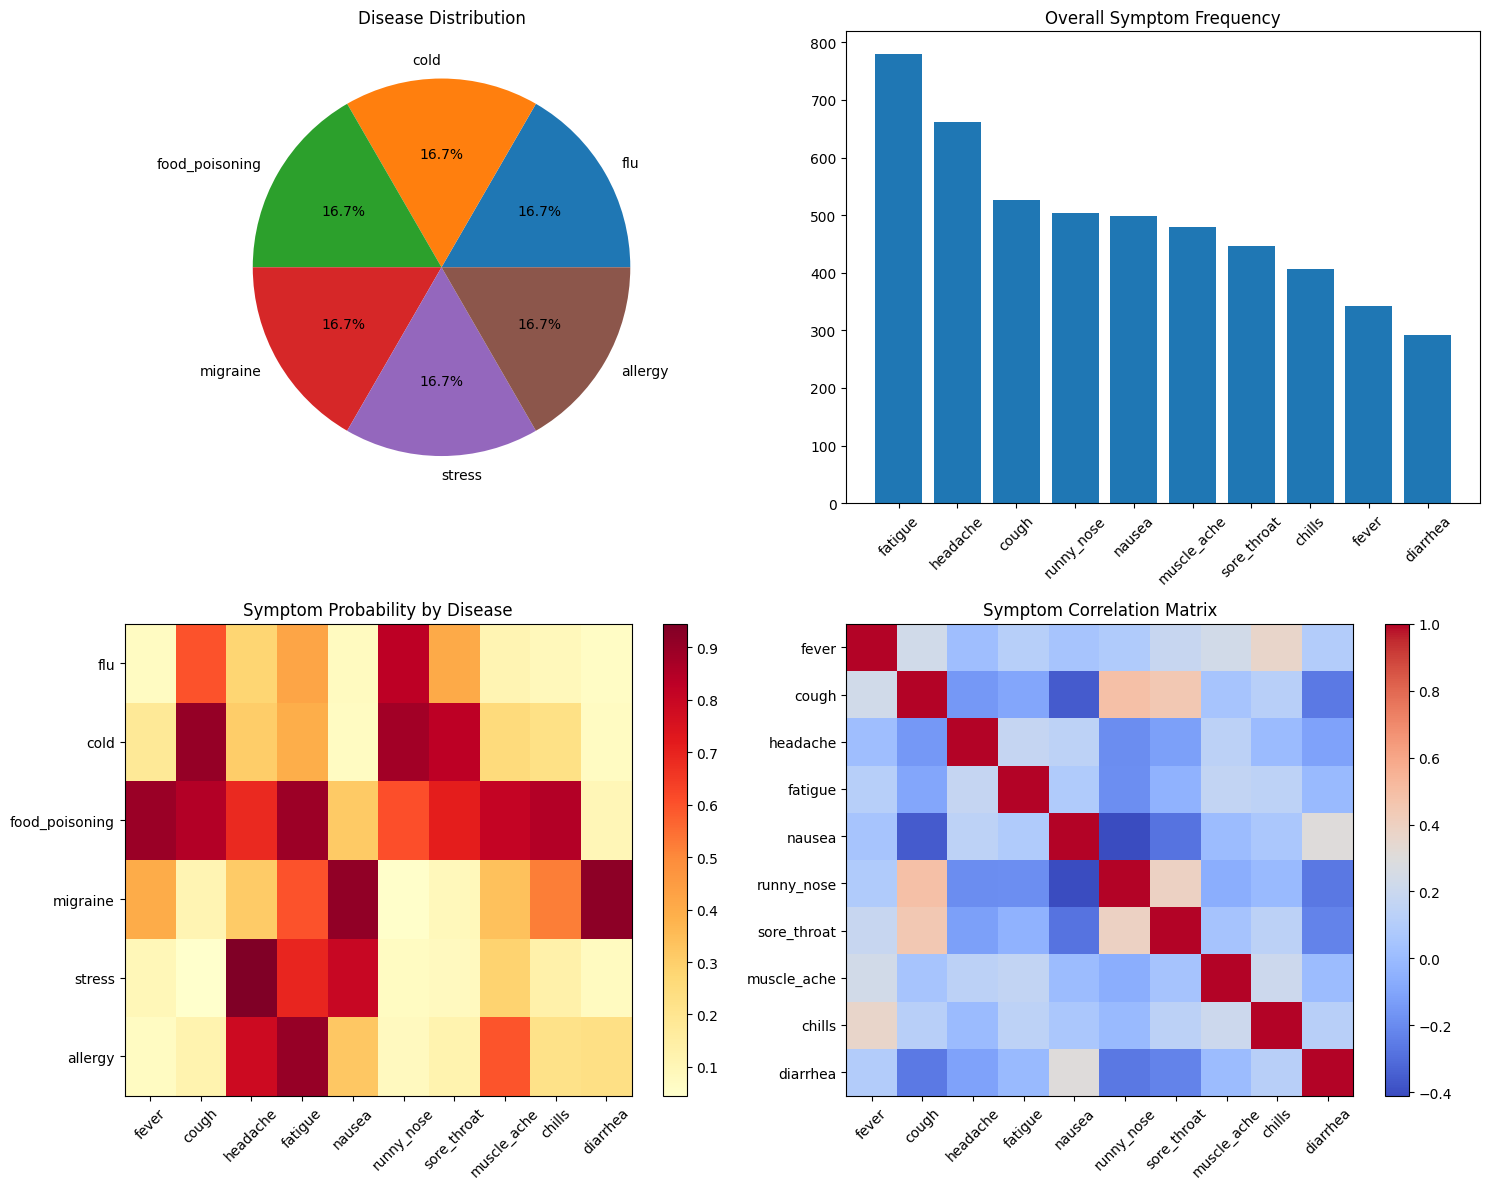

In [5]:
# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Disease distribution
axes[0, 0].pie(df['disease'].value_counts().values, 
               labels=df['disease'].value_counts().index, 
               autopct='%1.1f%%')
axes[0, 0].set_title('Disease Distribution')

# 2. Symptom frequency
symptom_freq = df[all_symptoms].sum().sort_values(ascending=False)
axes[0, 1].bar(range(len(symptom_freq)), symptom_freq.values)
axes[0, 1].set_xticks(range(len(symptom_freq)))
axes[0, 1].set_xticklabels(symptom_freq.index, rotation=45)
axes[0, 1].set_title('Overall Symptom Frequency')

# 3. Heatmap of symptoms by disease
symptom_by_disease = df.groupby('disease')[all_symptoms].mean()
im = axes[1, 0].imshow(symptom_by_disease.values, cmap='YlOrRd', aspect='auto')
axes[1, 0].set_xticks(range(len(all_symptoms)))
axes[1, 0].set_xticklabels(all_symptoms, rotation=45)
axes[1, 0].set_yticks(range(len(all_diseases)))
axes[1, 0].set_yticklabels(all_diseases)
axes[1, 0].set_title('Symptom Probability by Disease')
plt.colorbar(im, ax=axes[1, 0])

# 4. Correlation matrix
correlation_matrix = df[all_symptoms].corr()
im2 = axes[1, 1].imshow(correlation_matrix.values, cmap='coolwarm', aspect='auto')
axes[1, 1].set_xticks(range(len(all_symptoms)))
axes[1, 1].set_xticklabels(all_symptoms, rotation=45)
axes[1, 1].set_yticks(range(len(all_symptoms)))
axes[1, 1].set_yticklabels(all_symptoms)
axes[1, 1].set_title('Symptom Correlation Matrix')
plt.colorbar(im2, ax=axes[1, 1])

plt.tight_layout()
plt.show()

In [6]:
# Save to CSV
output_path = '../data/raw/disease_symptoms.csv'
df.to_csv(output_path, index=False)
print(f"Dataset saved to: {output_path}")

# Save summary statistics
summary_stats = {
    'total_samples': len(df),
    'num_diseases': len(all_diseases),
    'num_symptoms': len(all_symptoms),
    'disease_distribution': df['disease'].value_counts().to_dict(),
    'symptom_frequency': df[all_symptoms].sum().to_dict()
}

import json
with open('../data/processed/data_summary.json', 'w') as f:
    json.dump(summary_stats, f, indent=2)

print("Summary statistics saved!")

Dataset saved to: ../data/raw/disease_symptoms.csv
Summary statistics saved!
